In [1]:
#Import relevant packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns


In [2]:
#Import the datasets
df = pd.read_csv('clean_train.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.drop('date_recorded', axis=1, inplace=True)

In [5]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,1999,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,34310,25.0,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,2009,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe,functional
2,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,1986,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe,non functional
3,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,...,2009,submersible,user-group,per bucket,salty,enough,other,unknown,communal standpipe,functional
4,19816,0.0,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Ishinabulandi,...,0,handpump,user-group,never pay,good,enough,borehole,groundwater,hand pump,non functional


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46962 entries, 0 to 46961
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   funder                 46962 non-null  object 
 3   gps_height             46962 non-null  int64  
 4   installer              46962 non-null  object 
 5   longitude              46962 non-null  float64
 6   latitude               46962 non-null  float64
 7   wpt_name               46962 non-null  object 
 8   basin                  46962 non-null  object 
 9   subvillage             46962 non-null  object 
 10  region                 46962 non-null  object 
 11  region_code            46962 non-null  int64  
 12  district_code          46962 non-null  int64  
 13  lga                    46962 non-null  object 
 14  ward                   46962 non-null  object 
 15  po

In [7]:
# Convert boolean to integers for columns 'permit' and 'public_meeting' (0=False, 1=True)
df['permit'] = df['permit'].astype(int)
df['public_meeting'] = df['public_meeting'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46962 entries, 0 to 46961
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   funder                 46962 non-null  object 
 3   gps_height             46962 non-null  int64  
 4   installer              46962 non-null  object 
 5   longitude              46962 non-null  float64
 6   latitude               46962 non-null  float64
 7   wpt_name               46962 non-null  object 
 8   basin                  46962 non-null  object 
 9   subvillage             46962 non-null  object 
 10  region                 46962 non-null  object 
 11  region_code            46962 non-null  int64  
 12  district_code          46962 non-null  int64  
 13  lga                    46962 non-null  object 
 14  ward                   46962 non-null  object 
 15  po

# Visuals

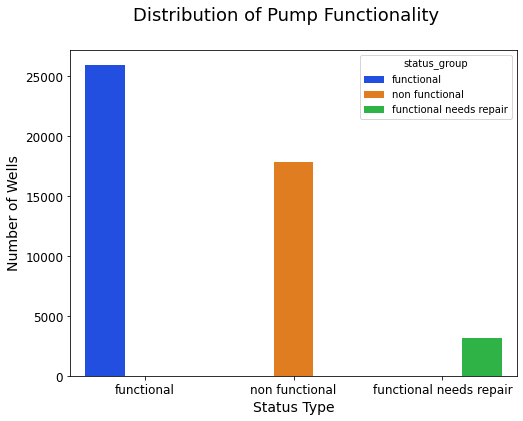

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', hue="status_group", palette='bright', data=df)

fig.suptitle('Distribution of Pump Functionality', fontsize=18)
plt.xlabel("Status Type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()


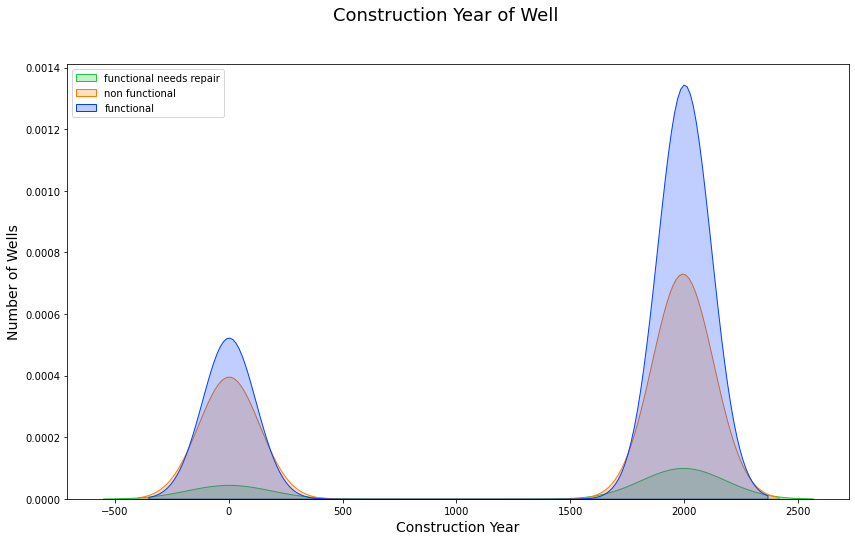

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Well', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

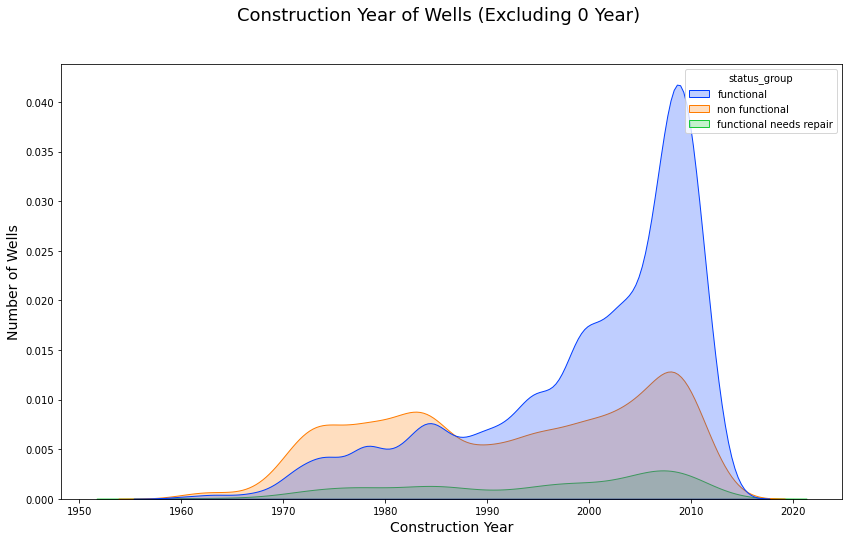

In [11]:
#Select wells without 'construction_year' = 0
df_actual_construction_years = df.loc[df['construction_year'] != 0]

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df_actual_construction_years, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Wells (Excluding 0 Year)', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
#plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

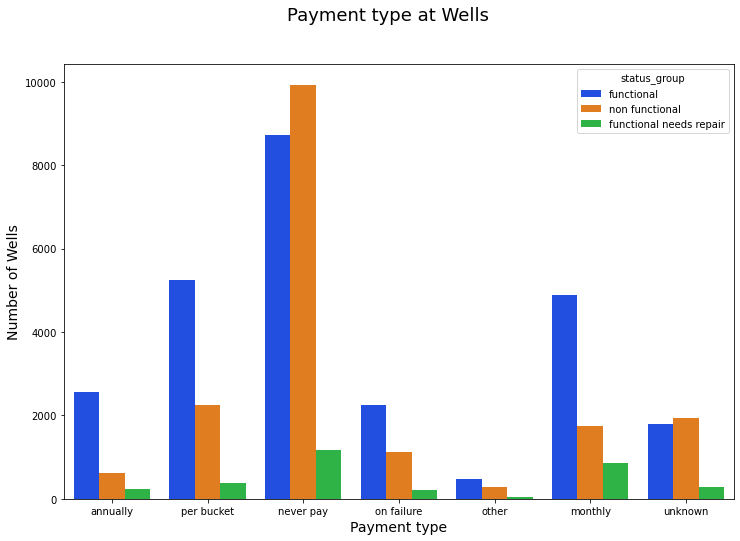

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue="status_group", palette='bright', data=df)

fig.suptitle('Payment type at Wells', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [24]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group', 'amount_tsh']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin', 'amount_tsh'])

X = df_test3.drop('status_group', axis=1)
y = df_test3['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.7646557842441448

In [25]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

In [31]:
plot_confusion_matrix(knn, y_test, y_pred)

ValueError: could not convert string to float: 'non functional'

In [ ]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group', 'amount_tsh']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin', 'amount_tsh'])

X = df_test3.drop('status_group', axis=1)
y = df_test3['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


# One Hot Encoder

In [ ]:
#import package 
from sklearn.preprocessing import OneHotEncoder

#instantiate
ohe = OneHotEncoder()

#fit and transform
df_encoded = ohe.fit_transform(df)

In [ ]:
s = pd.DataFrame(df_encoded.todense(), columns=ohe.get_feature_names()) 

In [ ]:
# Instantiate and fit a DecisionTreeClassifier with optimal parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=30, min_impurity_decrease=0.0, min_samples_split=30) 
tree_clf.fit(X_train, y_train)

plot_feature_importances(tree_clf)

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Modeling

In [ ]:
df.info()

In [ ]:
df_test3 = df[['construction_year', 'waterpoint_type_group', 'quantity', 'quality_group', 'extraction_type_class', 
               'management_group', 'permit', 'basin', 'status_group', 'amount_tsh']]

df_test3 = pd.get_dummies(df_test3, columns=['waterpoint_type_group', 'quality_group', 'extraction_type_class', 
                                             'quantity','management_group', 'permit', 'basin', 'amount_tsh'])

X = df_test2.drop('status_group', axis=1)
y = df_test2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth=2, random_state = 1)

clf.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show();

In [ ]:
df_test2 = df[['ward','status_group', 'amount_tsh']]

df_test2 = pd.get_dummies(df_test2, columns=['ward', 'amount_tsh'])

X = df_test2.drop('status_group', axis=1)
y = df_test2['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Create lists of categorical and continuous columns
cat_col = df[['funder','wpt_name','basin','subvillage','region','lga', 'ward','scheme_management',
           'extraction_type_class' ,'management_group', 'payment_type','quality_group', 'quantity','source_type', 
           'source_class', 'waterpoint_type_group','status_group']]
cont_col = df[['id','amount_tsh','gps_height','longitude','latitude', 'region_code', 'district_code','population',
            'construction_year']]

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(cat_col)

In [ ]:
dum_df

In [ ]:
df1 = tree_train(cat_col)


X = dum_df.drop('status_group', axis=1)
y = dum_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred)